In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
US_videos = pd.read_csv('US_length.csv')


US_videos['trending_date'] = pd.to_datetime(US_videos['trending_date'], format='%y.%d.%m')
US_videos['publish_time'] = pd.to_datetime(US_videos['publish_time'])
# for i, r in US_videos.iterrows():
# #     print(r['trending_date'])
# #     pd.to_datetime(r['trending_date'], format='%y.%d.%m')
#     US_videos['trending_date'][i] = pd.to_datetime(r['trending_date'], format='%y.%d.%m')

print((US_videos.head()))

      video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22 2017-11-13 17:13:01+00:00   
1           24 2017-11-13 07:30:00+00:00   
2           23 2017-11-12 19:05:24+00:00   
3           24 2017-11-13 11:00:04+00:00   
4           24 2017-11-12 18:01:41+00:00   

                                                tags    views   lik

In [4]:
# for i,r in US_videos.iterrows():
#     year = int(r['trending_date'].split('.')[0])
#     day = int(r['trending_date'].split('.')[1])
#     month = int(r['trending_date'].split('.')[2])
#     formatted = year * 10000 + month * 100 + day
#     US_videos.at[i, 'trending_date'] = formatted

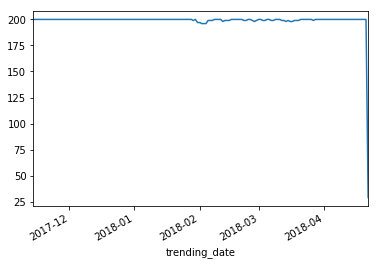

<bound method NDFrame.head of trending_date
2017-11-14    200
2017-11-15    200
2017-11-16    200
2017-11-17    200
2017-11-18    200
2017-11-19    200
2017-11-20    200
2017-11-21    200
2017-11-22    200
2017-11-23    200
2017-11-24    200
2017-11-25    200
2017-11-26    200
2017-11-27    200
2017-11-28    200
2017-11-29    200
2017-11-30    200
2017-12-01    200
2017-12-02    200
2017-12-03    200
2017-12-04    200
2017-12-05    200
2017-12-06    200
2017-12-07    200
2017-12-08    200
2017-12-09    200
2017-12-10    200
2017-12-11    200
2017-12-12    200
2017-12-13    200
             ... 
2018-03-18    199
2018-03-19    199
2018-03-20    199
2018-03-21    200
2018-03-22    200
2018-03-23    200
2018-03-24    200
2018-03-25    200
2018-03-26    200
2018-03-27    199
2018-03-28    200
2018-03-29    200
2018-03-30    200
2018-03-31    200
2018-04-01    200
2018-04-02    200
2018-04-03    200
2018-04-04    200
2018-04-05    200
2018-04-06    200
2018-04-07    200
2018-04-14    200
20

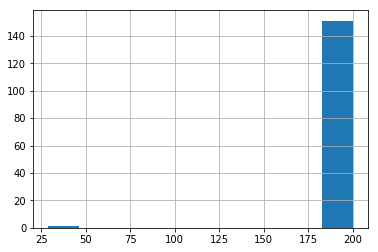

In [5]:
# US_videos['trending_date'].hist(bins=25)
# plt.show()
# plt.hist(US_videos['trending_date'].values, bins="auto")
# print(US_videos['trending_date'].head())
US_videos['trending_date'].groupby((US_videos["trending_date"])).count().plot()
plt.show()


print(US_videos['trending_date'].groupby((US_videos["trending_date"])).count().head)
US_videos['trending_date'].groupby((US_videos["trending_date"])).count().hist()
# US_videos['trending_date'].describe()

US_videos['totalSeconds'] = US_videos['hour'] * 3600 + US_videos['min'] * 60 + US_videos['sec']

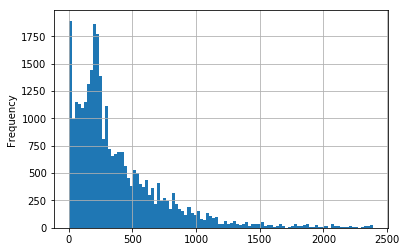

In [6]:
# US_videos['category_id'].hist(bins= 50,grid=True,xlabelsize=5)
# US_videos[US_videos['views'] < 10000]['views'].plot.hist(bins= 100,grid=True)

US_videos[US_videos['totalSeconds'] < 2400]['totalSeconds'].plot.hist(bins= 100,grid=True)

plot average length over time

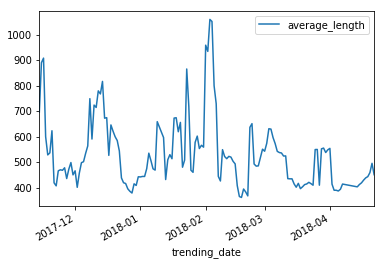

In [48]:
lengthOverTime = pd.DataFrame(index =US_videos['trending_date'].groupby((US_videos["trending_date"])).count().index, columns =['average_length']) 
# lengthOverTime = pd.DataFrame(index =US_videos['publish_time'].groupby((US_videos["publish_time"])).count().index, columns =['average_length']) ['sec']
for date, r in lengthOverTime.iterrows():
    # curr_length = US_videos[US_videos['trending_date'] == date]['title'].str.len()

    curr_length = US_videos[US_videos['trending_date'] == date]['totalSeconds']
    # curr_length = US_videos[US_videos['publish_time'] == date]['totalSeconds']
#     print((curr_length == 0).value_counts())
    curr_length = curr_length[curr_length != 0]
    # average_length = (curr_length[curr_length > 600].count())
#     print(curr_length[curr_length < 1000].count())
    
    average_length = sum(curr_length) /  curr_length.count()
    lengthOverTime['average_length'][date] = average_length

lengthOverTime.plot()


In [81]:
foo = lengthOverTime['average_length'].to_numpy()


numpy.ndarray

In [84]:
from scipy.stats import pearsonr

r, p = pearsonr(np.log10(foo.astype(np.float64)), np.arange(0, np.size(foo)))
r,p

(-0.2724783650093921, 0.0006835316762581829)

plot length over views

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24c162b0>,
      dtype=object)

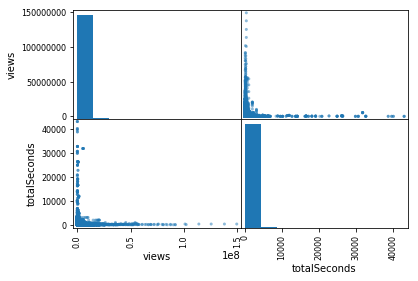

In [8]:
pd.plotting.scatter_matrix(US_videos[['views', 'totalSeconds']])

# US_videos['views','totalSeconds'].head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


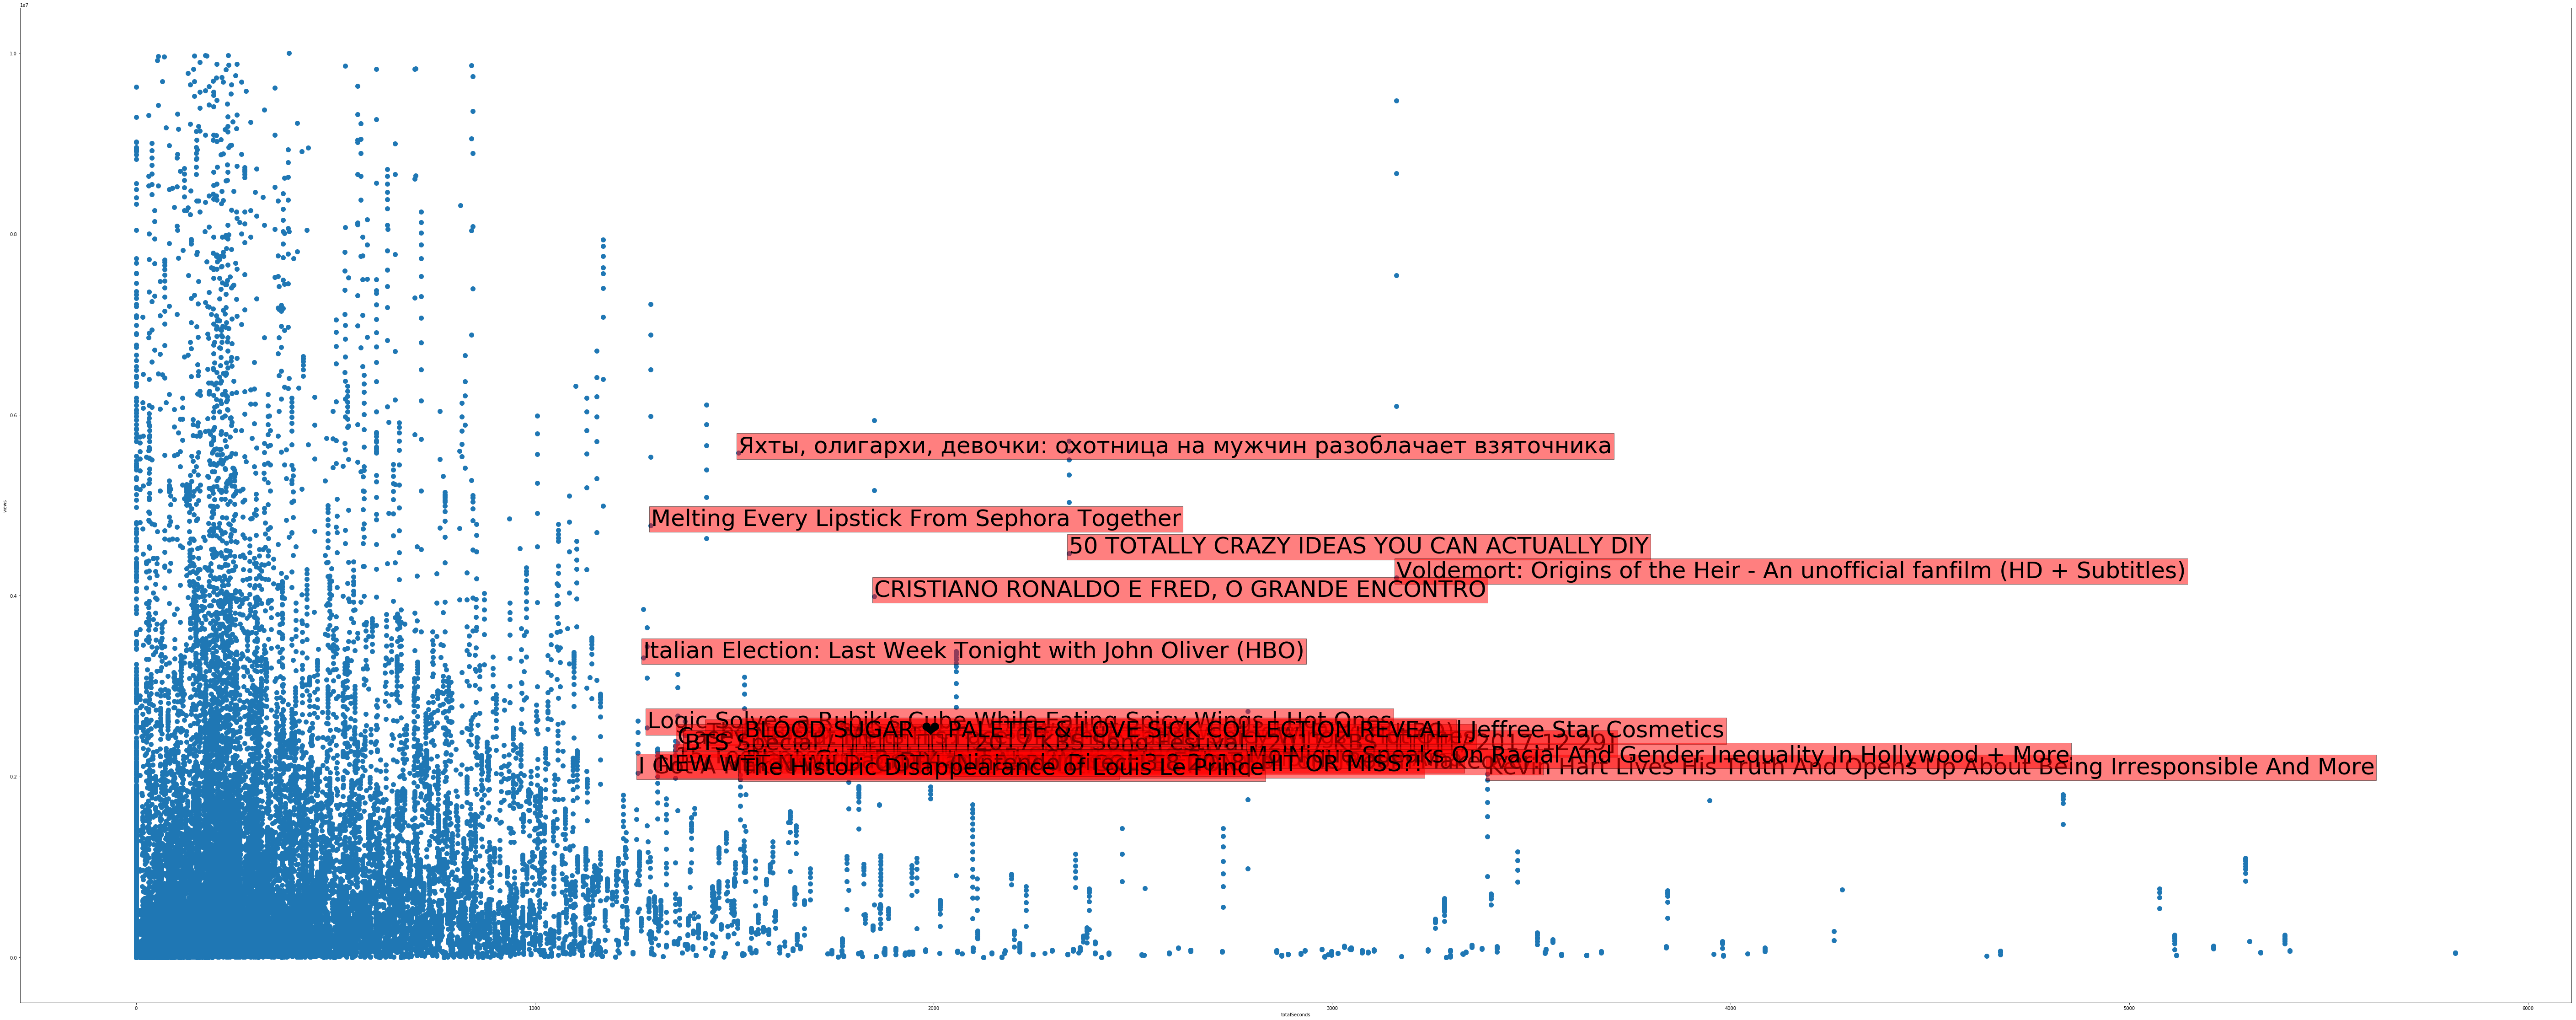

In [9]:
# p1 = US_videos.plot.scatter(y='views', x = 'totalSeconds', s= 1,figsize=(10,4))

# df = US_videos[(US_videos['views'] > 5000000) & (US_videos['totalSeconds'] > 2000)]

removed = US_videos[(US_videos['views'] < 10000000) & (US_videos['totalSeconds'] < 6000)]
p1 = removed.plot.scatter(y='views', x = 'totalSeconds', s= 100, figsize=(100,40))
df = removed[(US_videos['views'] > 2000000) & (US_videos['totalSeconds'] > 1200)]
# print(df.totalSeconds)
seen = set()

for line, row in df.iterrows():
    if row.video_id not in seen:
        p1.text(df.totalSeconds[line]+0.2, df.views[line], df.title[line], horizontalalignment='left', size='small', color='black',
                  bbox=dict(facecolor='red', alpha=0.5),fontsize = 50)
        seen.add(row.video_id)


In order to analyze the relationship between the popularity of a video (in this case we are using the views as an indicator), we create a linear model to predict the views of a video from the length of the videos and the length of the title. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


                            OLS Regression Results                            
Dep. Variable:               logViews   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     31.87
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.66e-08
Time:                        11:41:16   Log-Likelihood:                -58711.
No. Observations:               30179   AIC:                         1.174e+05
Df Residuals:                   30177   BIC:                         1.174e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.9835      0.010   1264.662   

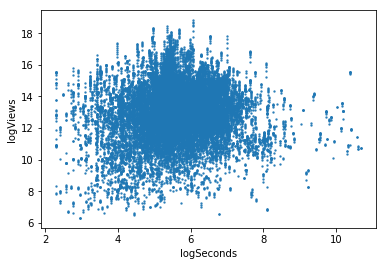

In [102]:
import patsy
import statsmodels.api as sm

import seaborn as sns

US_videos['logViews'] = np.log(US_videos['views'])
US_videos['logSeconds'] = np.log(US_videos['totalSeconds'])
# print(US_videos.head())

outcome_1, predictors_1 = patsy.dmatrices('logViews ~ totalSeconds', US_videos)

mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

# Print out the summary results of the model fitting
print(res_1.summary())


sns.regplot(x='logSeconds', y='logViews', data=US_videos,scatter_kws={'s':2})

# sns.regplot(x='totalSeconds', y='views', data=US_videos[(US_videos['views']< 10000) & (US_videos['totalSeconds'] < 2400)])




It can be seen that there are some outliers that skewed the regression. Therefore, we decide to remove certain outliers before running the regression again.

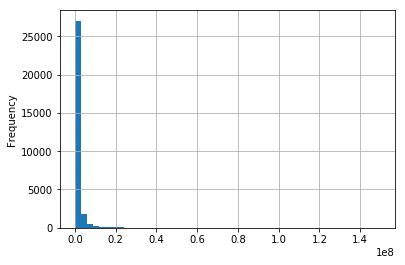

In [11]:
US_videos['views'].plot.hist(bins= 50,grid=True)

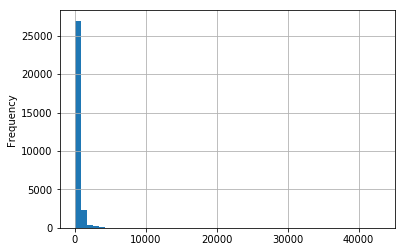

In [12]:
US_videos['totalSeconds'].plot.hist(bins= 50,grid=True)

As we can see, there are very few videos with views larger than 2e7 or total seconds larger then 6000 seconds. Therefore we are removing those videos and treat them as outliers.

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     54.41
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.67e-13
Time:                        10:41:15   Log-Likelihood:            -4.7722e+05
No. Observations:               29762   AIC:                         9.544e+05
Df Residuals:                   29760   BIC:                         9.545e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.297e+06   1.67e+04     77.563   

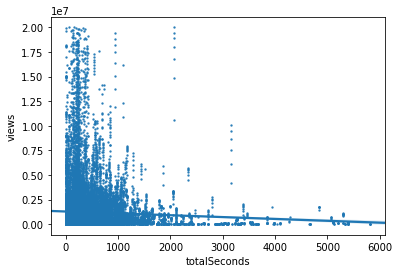

In [13]:
removed = US_videos[(US_videos['views']< 20000000) & (US_videos['totalSeconds'] < 6000)]
outcome_2, predictors_2 = patsy.dmatrices('views ~ totalSeconds', removed)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

# Print out the summary results of the model fitting
print(res_2.summary())
sns.regplot(x='totalSeconds', y='views', data=removed, scatter_kws={'s':2})
# sns.regplot(x='totalSeconds', y='views', data=US_videos[(US_videos['views']< 10000) & (US_videos['totalSeconds'] < 2400)])

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     236.4
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           4.30e-53
Time:                        10:44:55   Log-Likelihood:            -3.4822e+05
No. Observations:               23436   AIC:                         6.964e+05
Df Residuals:                   23434   BIC:                         6.965e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.593e+05   7713.947     72.508   

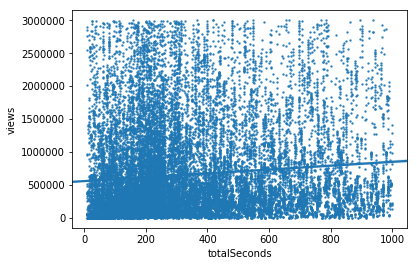

In [20]:
removed = US_videos[(US_videos['views']< 3000000) & (US_videos['totalSeconds'] < 1000)& (US_videos['totalSeconds'] != 0)]
outcome_2, predictors_2 = patsy.dmatrices('views ~ totalSeconds', removed)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

# Print out the summary results of the model fitting
print(res_2.summary())
sns.regplot(x='totalSeconds', y='views', data=removed, scatter_kws={'s':2})

In [29]:
US_videos['title_length'] = US_videos['title'].str.len()

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           7.54e-27
Time:                        11:15:04   Log-Likelihood:            -5.0513e+05
No. Observations:               30179   AIC:                         1.010e+06
Df Residuals:                   30177   BIC:                         1.010e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.225e+06   6.94e+04     32.081   

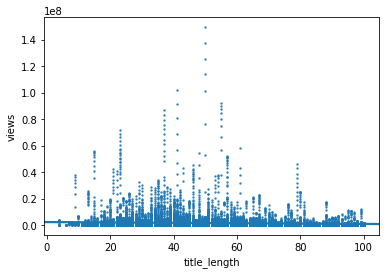

In [30]:
outcome, predictors = patsy.dmatrices('views ~ title_length', US_videos)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

# Print out the summary results of the model fitting
print(res.summary())
sns.regplot(x='title_length', y='views', data=US_videos, scatter_kws={'s':2})

                            OLS Regression Results                            
Dep. Variable:               logViews   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     229.4
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.22e-51
Time:                        11:43:42   Log-Likelihood:                -58613.
No. Observations:               30179   AIC:                         1.172e+05
Df Residuals:                   30177   BIC:                         1.172e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.3311      0.026    512.129   

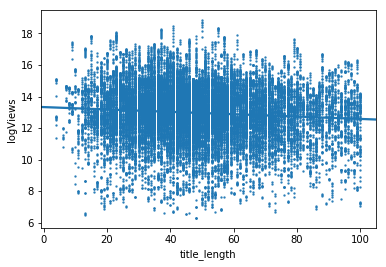

In [103]:

outcome, predictors = patsy.dmatrices('logViews ~ title_length', US_videos)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

# Print out the summary results of the model fitting
print(res.summary())
sns.regplot(x='title_length', y='logViews', data=US_videos, scatter_kws={'s':2})

In [43]:

np.sort(US_videos['title_length'].unique())

array([  4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100])